 Part 1: Physics Programs Using Basic Programming
 Constructs
 

Task 1.1: Simple Harmonic Motion

Mass: light


<function matplotlib.pyplot.show(close=None, block=None)>

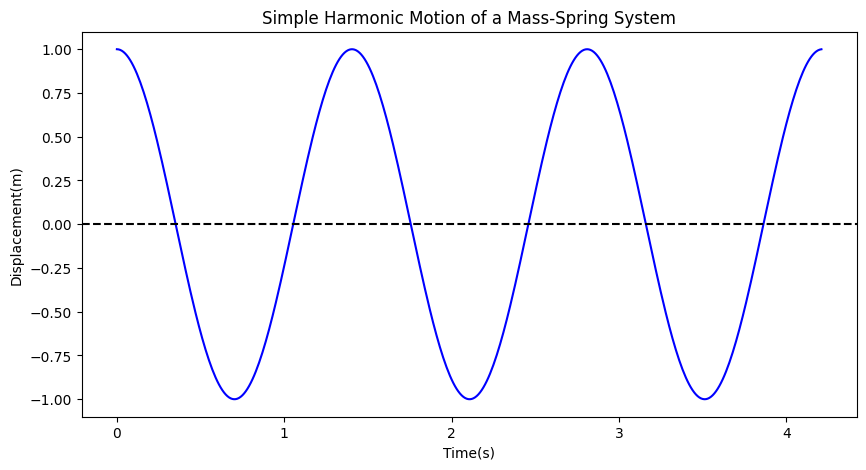

In [1]:
import matplotlib.pyplot as plt
import numpy as np

A = 1 #meter
k = 10 #N/m
phi = 0
mass = input("Mass:").lower()

if mass == "light":
    m = 0.5
elif mass == "medium":
    m = 1.0
elif mass == "heavy":
    m = 2.0
else:
    m = 1.0

omega = np.sqrt(k/m)
displacements = []

T = (2*np.pi)/omega
time = np.arange(0, 3*T, 0.01)
for t in time :
    x = A*np.cos(omega*t + phi)
    displacements.append(x)

plt.figure(figsize=(10, 5))
plt.plot(time,displacements, color = 'blue')
plt.xlabel('Time(s)')
plt.ylabel('Displacement(m)')
plt.title('Simple Harmonic Motion of a Mass-Spring System')
plt.axhline(0, color = 'black', linestyle = '--')
plt.legend
plt.show
    


 Task 1.2: Projectile Motion

Initial velocity: 20
Angle: 60


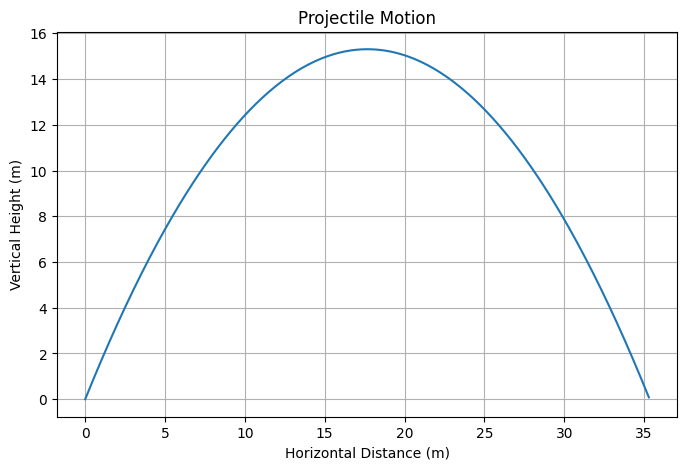

In [2]:
g = 9.8
v0 = float(input("Initial velocity:"))
angle = float(input("Angle:"))
angle_rad = np.radians(angle)
v_x = v0*np.cos(angle_rad)
v_y = v0*np.sin(angle_rad)

x_vals = []
y_vals = []
dt = 0.01
t = 0

x = 0
y = 0
while True:
    x = v_x * t
    y = v_y * t - 0.5 * g * t**2
    
    if y >= 0:
        x_vals.append(x)
        y_vals.append(y)
    else:
        break

    t += dt
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals)
plt.title("Projectile Motion")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Height (m)")
plt.grid(True)
plt.show()

Task 1.3: Planetary Motion (Basic Simulation)

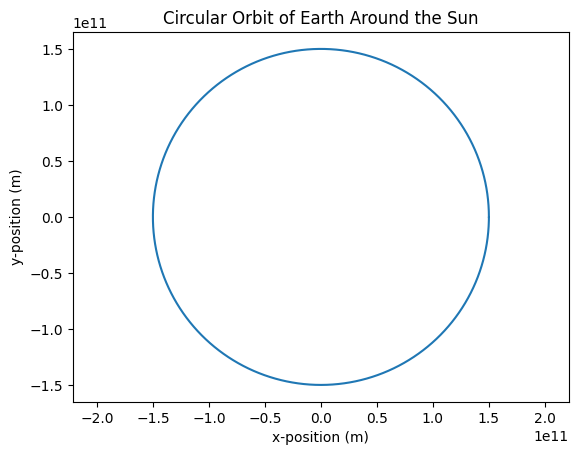

In [3]:
#For earth

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

r = 1.5 * 10**(11)
T = 365.25 * 24 * 3600
omega = (2*np.pi)/T
theta = 0
t = 0
dt = 24 * 3600

x_vals = []
y_vals = []
while t <= T:
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    x_vals.append(x)
    y_vals.append(y)
    
    theta += (omega*dt)
    t += dt
    
plt.plot(x_vals, y_vals)
plt.title("Circular Orbit of Earth Around the Sun")
plt.xlabel("x-position (m)")
plt.ylabel("y-position (m)")
plt.axis("equal") 
plt.show()

 Task 1.4: Matrix Multiplication

In [4]:
A = np.array([[6,5],[8,9]])
B = np.array([[4,3],[2,9]])

C = A @ B
D = np.dot(A,B)

print("Matrix A:",A)
print("Matrix B:",B)
print("Product 1:",C)
print("Product 2:",D)

Matrix A: [[6 5]
 [8 9]]
Matrix B: [[4 3]
 [2 9]]
Product 1: [[ 34  63]
 [ 50 105]]
Product 2: [[ 34  63]
 [ 50 105]]


 Bonus: Creative Physics Simulation

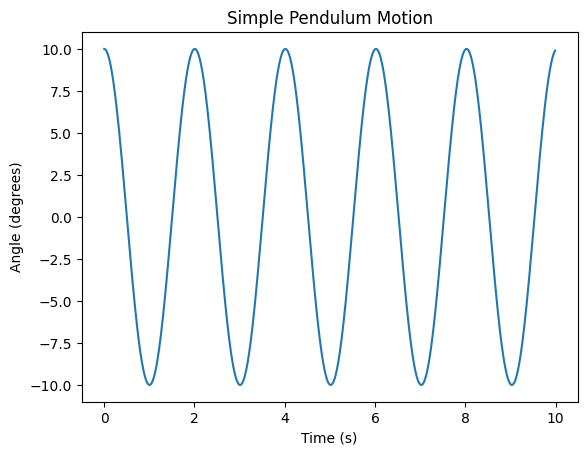

In [5]:
g = 9.8       
L = 1.0         
theta_0 = np.radians(10) 

t_max = 10       
dt = 0.01      
n_steps = int(t_max / dt)

omega = np.sqrt(g / L)

time = []
theta = []

for i in range(n_steps):
    t = i * dt
    angle = theta_0 * np.cos(omega * t) 
    time.append(t)
    theta.append(np.degrees(angle))  

plt.plot(time, theta)
plt.title("Simple Pendulum Motion")
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.show()


Part 2- Pandas and Matplotlib

Task 2.1. Data Loading and Cleaning

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('student_data.csv')
#print(df)
numeric_columns = ['Age', 'Physics', 'Chemistry', 'Mathematics', 'Attendance']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)

 Task 2.2. Feature Engineering

In [7]:
#df['Average_Marks'] = (df['Physics'] + df['Chemistry'] + df['Mathematics']) / 3
df['Average_Marks'] = df[['Physics', 'Chemistry', 'Mathematics']].mean(axis=1)

df['Pass'] = (df[['Physics', 'Chemistry', 'Mathematics']] >= 40).all(axis=1)
df['Pass'] = df['Pass'].map({True: 'Yes', False: 'No'})
print(df)



          Name  Age  Gender       City  Physics  Chemistry  Mathematics  \
0    Student_1   20    Male     Mumbai       76         82           26   
1    Student_2   21  Female     Mumbai       32         76           35   
2    Student_3   18    Male    Kolkata       30         36           79   
3    Student_4   20  Female     Mumbai       34         63           21   
4    Student_5   20    Male     Mumbai       43         26           20   
5    Student_6   21  Female    Kolkata       56         27           67   
6    Student_7   18  Female    Kolkata       38         80           31   
7    Student_8   18    Male      Delhi       44         83           88   
8    Student_9   20    Male  Bangalore       71         26           56   
9   Student_10   19    Male  Bangalore       80         26           51   
10  Student_11   20    Male     Mumbai       92         78           28   
11  Student_12   20    Male  Bangalore       81         25           38   
12  Student_13   20    Ma

 Task 2.3. Statistical Summary

In [8]:
grouped = df.groupby('Gender')[['Average_Marks', 'Attendance']].mean()
print(grouped)

        Average_Marks  Attendance
Gender                           
Female      62.310345   77.731379
Male        56.380952   82.765238


In [9]:
top_5_students = df.sort_values(by='Average_Marks', ascending=False).head(5)[['Name', 'Average_Marks']]
print(top_5_students)

          Name  Average_Marks
26  Student_27      88.333333
33  Student_34      87.000000
20  Student_21      87.000000
30  Student_31      82.333333
41  Student_42      80.333333


In [10]:
pass_fail_counts = df['Pass'].value_counts()
print(pass_fail_counts)

No     27
Yes    23
Name: Pass, dtype: int64


 Task 2.4. Data Visualization using Matplotlib

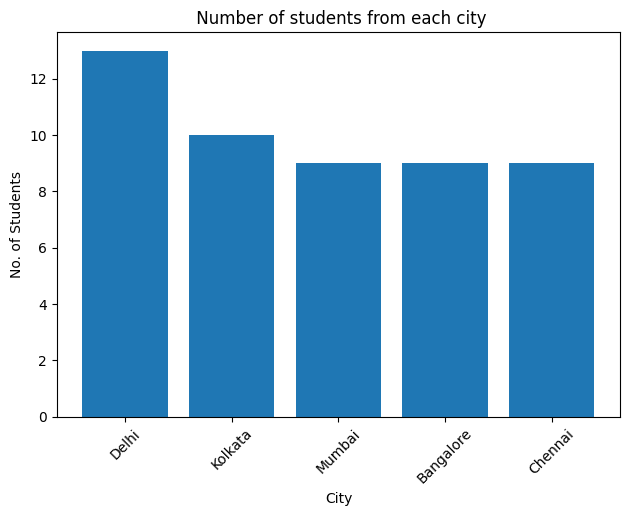

In [11]:
city_counts = df['City'].value_counts()
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('No. of Students')
plt.title(' Number of students from each city')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

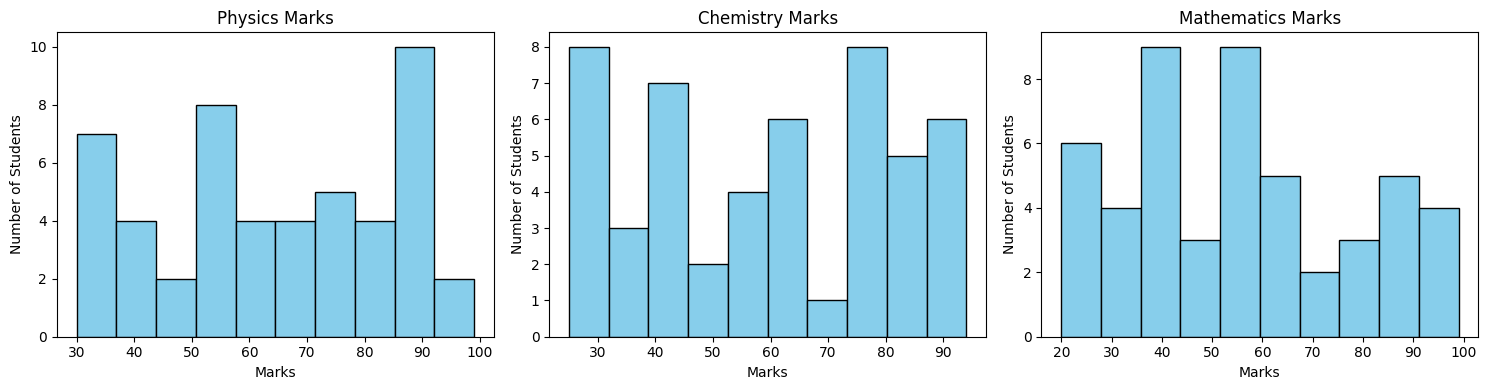

In [12]:
subjects = ['Physics', 'Chemistry', 'Mathematics']

plt.figure(figsize=(15, 4))

for i, subject in enumerate(subjects):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[subject], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'{subject} Marks')
    plt.xlabel('Marks')
    plt.ylabel('Number of Students')

plt.tight_layout()
plt.show()

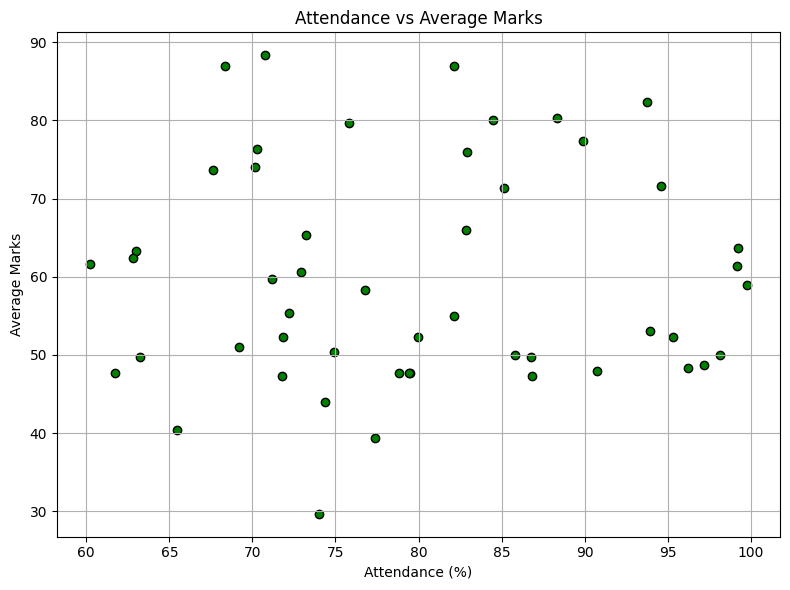

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Attendance'], df['Average_Marks'], color='green', edgecolors='black')
plt.xlabel('Attendance (%)')
plt.ylabel('Average Marks')
plt.title('Attendance vs Average Marks')
plt.grid(True)
plt.tight_layout()
plt.show()

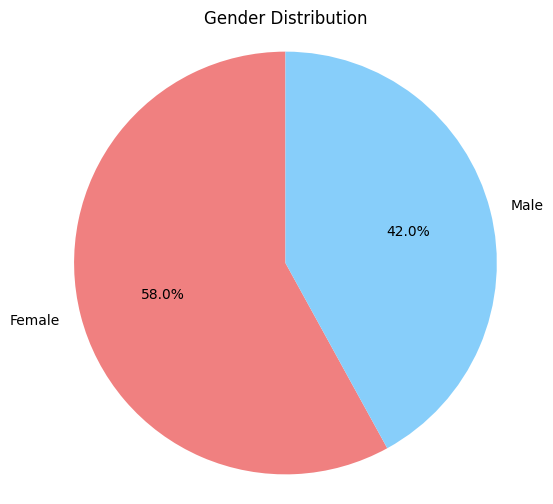

In [14]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts,
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()


Task 2.5. Advanced Plotting

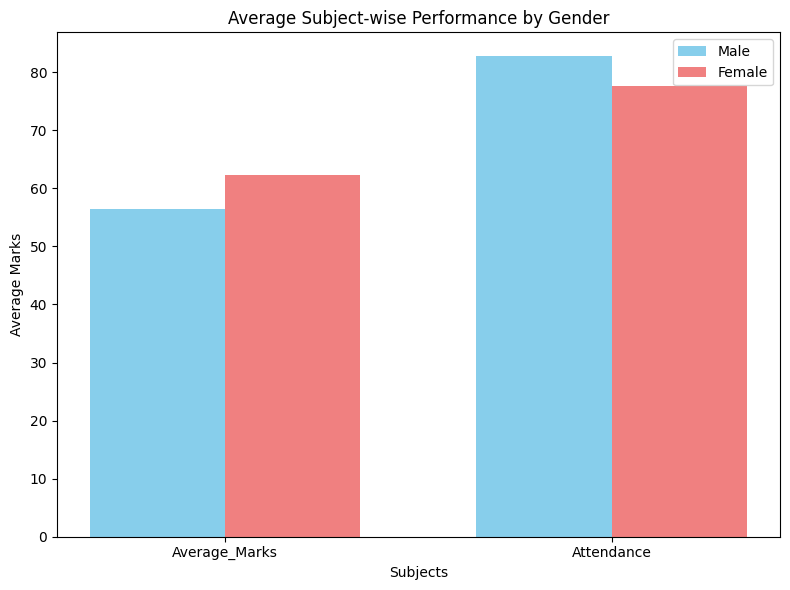

In [15]:
grouped = df.groupby('Gender')[['Average_Marks', 'Attendance']].mean()
subjects = grouped.columns
x = np.arange(len(subjects)) 
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, grouped.loc['Male'], width, label='Male', color='skyblue')
plt.bar(x + width/2, grouped.loc['Female'], width, label='Female', color='lightcoral')

plt.xlabel('Subjects')
plt.ylabel('Average Marks')
plt.title('Average Subject-wise Performance by Gender')
plt.xticks(x, subjects)
plt.legend()
plt.tight_layout()
plt.show()


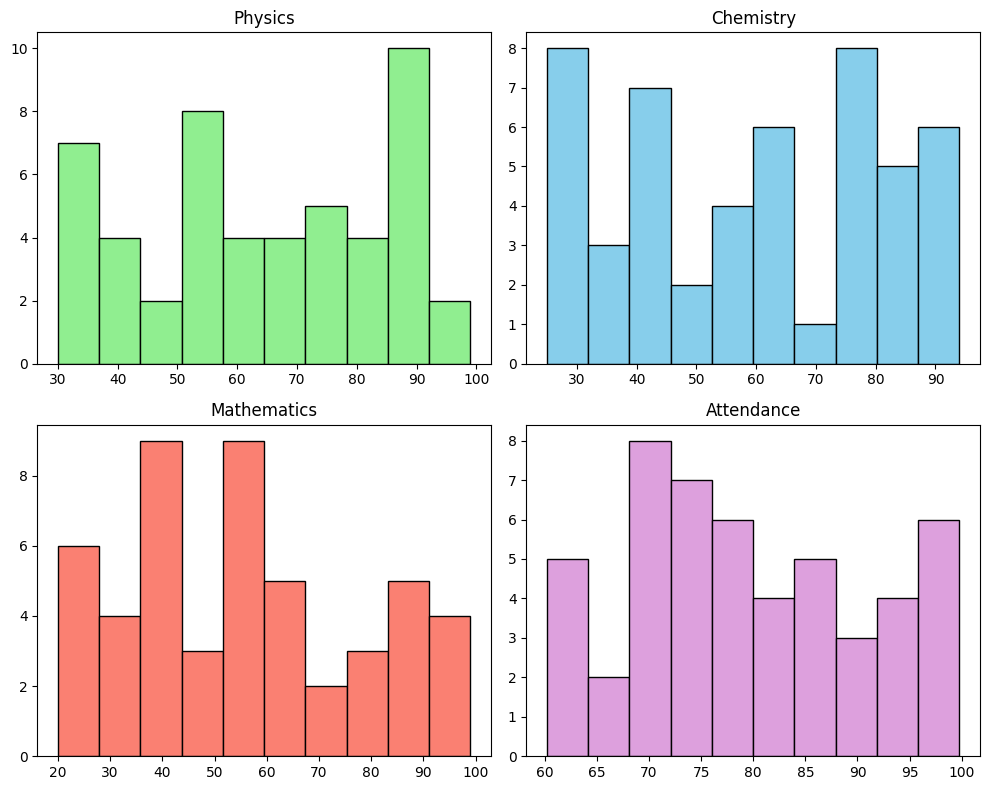

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 


axs[0, 0].hist(df['Physics'], bins=10, color='lightgreen', edgecolor='black')
axs[0, 0].set_title('Physics')

axs[0, 1].hist(df['Chemistry'], bins=10, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Chemistry')

axs[1, 0].hist(df['Mathematics'], bins=10, color='salmon', edgecolor='black')
axs[1, 0].set_title('Mathematics')

axs[1, 1].hist(df['Attendance'], bins=10, color='plum', edgecolor='black')
axs[1, 1].set_title('Attendance')

plt.tight_layout()
plt.savefig('student_analysis.png')
plt.show()


 Task 2.6. Export and Report

In [18]:
df.to_csv('student_data_cleaned.csv', index=False)


 Part 3- Advanced Matplotlib

 Task 3.1. Reusable Plotting Function

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(8, 5))
    plt.scatter(df[x_col], df[y_col], color='blue', alpha=0.7)
    plt.title(f'Scatter Plot of {y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()
    


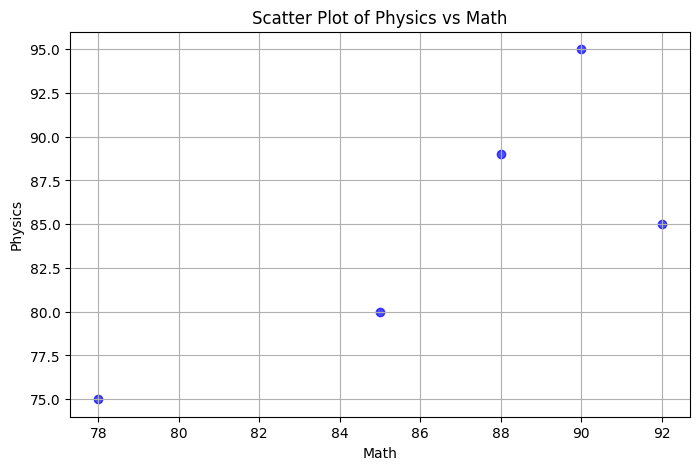

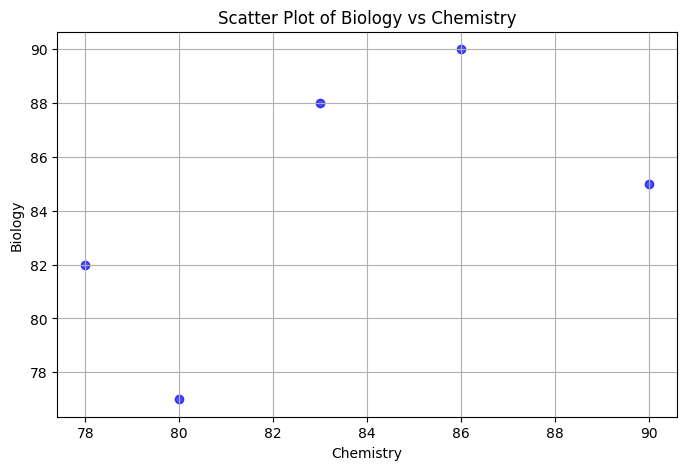

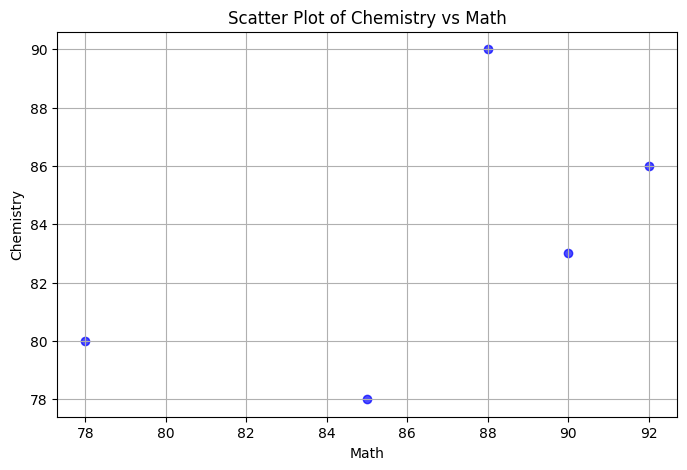

In [20]:
data = {
    'Math': [85, 90, 78, 92, 88],
    'Physics': [80, 95, 75, 85, 89],
    'Chemistry': [78, 83, 80, 86, 90],
    'Biology': [82, 88, 77, 90, 85]
}

df = pd.DataFrame(data)

scatter_plot(df, 'Math', 'Physics')
scatter_plot(df, 'Chemistry', 'Biology')
scatter_plot(df, 'Math', 'Chemistry')



Task 3.2. Subplots in Matplotli

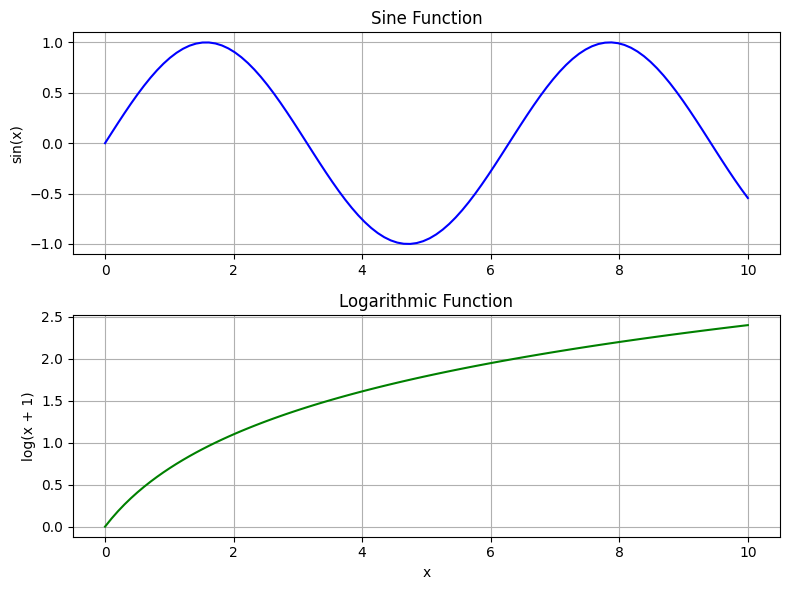

In [21]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.log(x + 1)

fig, axs = plt.subplots(2, 1, figsize=(8, 6)) 

axs[0].plot(x, y1, color='blue')
axs[0].set_title('Sine Function')
axs[0].set_ylabel('sin(x)')
axs[0].grid(True)

axs[1].plot(x, y2, color='green')
axs[1].set_title('Logarithmic Function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('log(x + 1)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Task 3.3. Error Handling with Try and Raise

In [22]:
from pandas.errors import ParserError

def read_and_validate_csv(file_path, required_cols):
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print("File not found. Please check the path.")
        return

    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in the data: {missing_cols}")
    
    print(" File loaded successfully with required columns.")
    return df

required_columns = ['Name', 'Math', 'Physics']
df = read_and_validate_csv("student_scores.csv", required_columns)

File not found. Please check the path.


Task 3.4. 3D Plot with Matplotlib

   StudyHours  ExamScore  SleepHours  Attendance
0           1         40         6.0          80
1           2         45         6.5          85
2           3         50         7.0          88
3           4         55         7.5          90
4           5         60         7.0          92
5           6         65         8.0          95
6           7         75         8.5          97
7           8         85         9.0          98
8           9         90         9.5          99


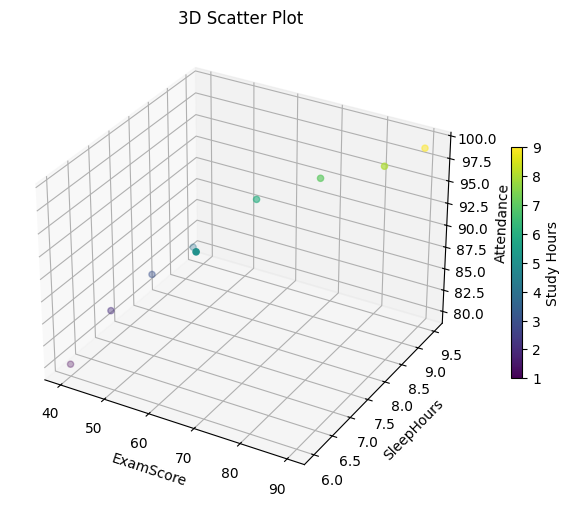

In [23]:
from mpl_toolkits.mplot3d import Axes3D 
df = pd.read_csv('sample_data.csv')
print(df)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(df["ExamScore"], df["SleepHours"], df["Attendance"],
                     c=df["StudyHours"], cmap="viridis")

cbar = plt.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label("Study Hours")

ax.set_xlabel("ExamScore")
ax.set_ylabel("SleepHours")
ax.set_zlabel("Attendance")
plt.title("3D Scatter Plot")
plt.show()